In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV,cross_val_score, KFold
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
# rmse
def regression_result(y_true,y_pred):
    mse=metrics.mean_squared_error(y_true, y_pred)
    rmse=round(np.sqrt(mse),4)
    return rmse
    
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [5]:
df = pd.read_csv('DataML2.csv')

In [6]:
df['period'] = pd.to_datetime(df['period'], format='%b-%y')


In [7]:
df.index.name = None

In [8]:
df.columns

Index(['period', 'gdprl', 'csplrl', 'csprl', 'cslrl', 'csgrl', 'invrl',
       'xgsrl', 'mgsrl', 'inhrl', 'inbrl', 'retailsales', 'sukucadang',
       'manminrok', 'bbm', 'gadget', 'perlengkapanrt', 'barangbudaya',
       'baranglain', 'barangsandang', 'onlinesales', 'onlinetranspr',
       'mobilsales', 'motorsales', 'konsumsiskn', 'tariktunai', 'belanjadebet',
       'tariktunaicc', 'ntp', 'wageburuh', 'wageart', 'wagebarber',
       'wagetukang', 'ihsg', 'yield1y', 'IHPRsekunder', 'DPKindividu',
       'KreditKonsumsi', 'JobVacancy', 'IKK', 'IKE', 'IEK', 'jalantolgol1',
       'inflasipendidikan', 'inflasikesehatan', 'devisa_transpor',
       'devisa_travel', 'semensales', 'imporkonstruksi', 'orderbook',
       'voltraffgol3', 'voltraffgol5', 'presalesprop', 'pmi', 'salesalatberat',
       'kredit_mk', 'kredit_inv', 'voltraffgol4', 'rtgs', 'prod_motor',
       'ekspor_nm_rl', 'impor_nm_rl', 'ekspor_nm_pi', 'impor_nm_pi',
       'ekspor_mg_nl', 'impor_mg_nl', 'sup_valas_jl', 'sup_val

In [9]:
df = df.set_index('period')

In [10]:
#invrl, mgsrl, jalantolgol1, goog_retail, goog_parks, goog_transit, goog_avg
data = df.drop(columns=['gdprl', 'csprl', 'cslrl', 'csgrl', 'xgsrl',
       'inhrl', 'retailsales', 'sukucadang', 'manminrok', 'bbm',
       'gadget', 'perlengkapanrt', 'barangbudaya', 'baranglain',
       'barangsandang', 'onlinesales', 'onlinetranspr', 'mobilsales',
       'motorsales', 'konsumsiskn', 'tariktunai', 'belanjadebet',
       'tariktunaicc', 'ntp', 'wageburuh', 'wageart', 'wagebarber',
       'wagetukang', 'ihsg', 'yield1y', 'IHPRsekunder', 'DPKindividu',
       'KreditKonsumsi', 'JobVacancy', 'IKK', 'IKE', 'IEK',
       'inflasipendidikan', 'inflasikesehatan', 'devisa_transpor',
       'devisa_travel', 'semensales', 'imporkonstruksi', 'orderbook',
       'voltraffgol3', 'voltraffgol5', 'presalesprop', 'pmi', 'salesalatberat',
       'kredit_mk', 'kredit_inv', 'voltraffgol4', 'rtgs', 'prod_motor',
       'ekspor_nm_rl', 'impor_nm_rl', 'ekspor_nm_pi', 'impor_nm_pi',
       'ekspor_mg_nl', 'impor_mg_nl', 'sup_valas_jl', 'sup_valas_bl',
       'goog_groc', 'goog_work', 'jalantolgol1','goog_retail','goog_parks',
       'goog_res','IPBK', 'IPAMM', 'ITP', 'IIK','goog_transit','goog_avg'])
data

,csplrl,invrl,mgsrl,inbrl
period,,,,
2012-01-01,5.780286,6.986212,11.053824,11.224086
2012-02-01,5.780286,6.986212,11.053824,11.224086
2012-03-01,5.780286,6.986212,11.053824,11.224086
2012-04-01,6.967163,10.131111,15.426255,19.656792
2012-05-01,6.967163,10.131111,15.426255,19.656792
...,...,...,...,...
2020-09-01,-4.001398,-6.479756,-23.003171,-8.989116
2020-10-01,-3.582511,-6.151957,-13.517052,-4.708003
2020-11-01,-3.582511,-6.151957,-13.517052,-4.708003


In [11]:
data = data[data.columns].pct_change(periods=12)
#data = data[data.columns].pct_change(period=12)
data

,csplrl,invrl,mgsrl,inbrl
period,,,,
2012-01-01,NaN,NaN,NaN,NaN
2012-02-01,NaN,NaN,NaN,NaN
2012-03-01,NaN,NaN,NaN,NaN
2012-04-01,NaN,NaN,NaN,NaN
2012-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-09-01,-1.791276,-2.538582,1.756911,-5.619057
2020-10-01,-1.725825,-2.509009,0.711277,129.554946
2020-11-01,-1.725825,-2.509009,0.711277,129.554946


In [12]:
data = data.dropna()
data

,csplrl,invrl,mgsrl,inbrl
period,,,,
2013-01-01,-0.063111,0.080363,-0.735963,-0.436028
2013-02-01,-0.063111,0.080363,-0.735963,-0.436028
2013-03-01,-0.063111,0.080363,-0.735963,-0.436028
2013-04-01,-0.270653,-0.479239,-0.942783,-1.069818
2013-05-01,-0.270653,-0.479239,-0.942783,-1.069818
...,...,...,...,...
2020-09-01,-1.791276,-2.538582,1.756911,-5.619057
2020-10-01,-1.725825,-2.509009,0.711277,129.554946
2020-11-01,-1.725825,-2.509009,0.711277,129.554946


In [13]:
scal = StandardScaler()
scaler = scal.fit_transform(data.values)
scaler

array([[ 2.18741340e-01,  4.21709638e-01, -7.39867100e-02,
        -1.76080482e-01],
       [ 2.18741340e-01,  4.21709638e-01, -7.39867100e-02,
        -1.76080482e-01],
       [ 2.18741340e-01,  4.21709638e-01, -7.39867100e-02,
        -1.76080482e-01],
       [-1.18068601e-01, -1.62071843e-01, -8.84659333e-02,
        -2.04023300e-01],
       [-1.18068601e-01, -1.62071843e-01, -8.84659333e-02,
        -2.04023300e-01],
       [-1.18068601e-01, -1.62071843e-01, -8.84659333e-02,
        -2.04023300e-01],
       [ 9.40046976e-01, -8.27077280e-02,  6.00255943e-01,
        -1.94369543e-01],
       [ 9.40046976e-01, -8.27077280e-02,  6.00255943e-01,
        -1.94369543e-01],
       [ 9.40046976e-01, -8.27077280e-02,  6.00255943e-01,
        -1.94369543e-01],
       [ 8.41988915e-01, -4.93092342e-01, -1.02682642e-01,
        -2.22073340e-01],
       [ 8.41988915e-01, -4.93092342e-01, -1.02682642e-01,
        -2.22073340e-01],
       [ 8.41988915e-01, -4.93092342e-01, -1.02682642e-01,
      

In [14]:
data = pd.DataFrame(scaler, columns = data.columns, index = data.index)
data

,csplrl,invrl,mgsrl,inbrl
period,,,,
2013-01-01,0.218741,0.421710,-0.073987,-0.176080
2013-02-01,0.218741,0.421710,-0.073987,-0.176080
2013-03-01,0.218741,0.421710,-0.073987,-0.176080
2013-04-01,-0.118069,-0.162072,-0.088466,-0.204023
2013-05-01,-0.118069,-0.162072,-0.088466,-0.204023
...,...,...,...,...
2020-09-01,-2.585811,-2.310400,0.100537,-0.404592
2020-10-01,-2.479593,-2.279549,0.027333,5.555025
2020-11-01,-2.479593,-2.279549,0.027333,5.555025


In [15]:
data = data.fillna(method = 'pad')
data

,csplrl,invrl,mgsrl,inbrl
period,,,,
2013-01-01,0.218741,0.421710,-0.073987,-0.176080
2013-02-01,0.218741,0.421710,-0.073987,-0.176080
2013-03-01,0.218741,0.421710,-0.073987,-0.176080
2013-04-01,-0.118069,-0.162072,-0.088466,-0.204023
2013-05-01,-0.118069,-0.162072,-0.088466,-0.204023
...,...,...,...,...
2020-09-01,-2.585811,-2.310400,0.100537,-0.404592
2020-10-01,-2.479593,-2.279549,0.027333,5.555025
2020-11-01,-2.479593,-2.279549,0.027333,5.555025


Text(0.5, 1.0, 'inbrl')

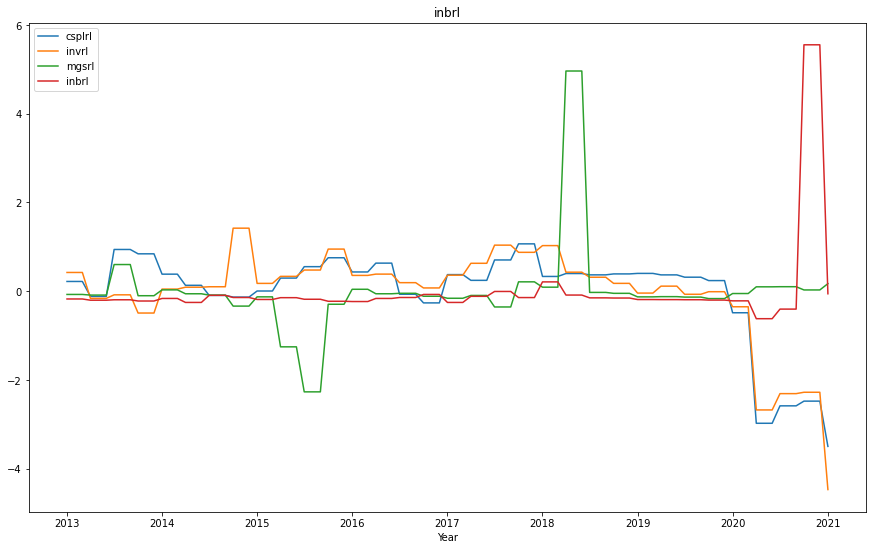

In [16]:
fig, ax = plt.subplots(figsize = (15,9))
col = data.columns
for i in data.columns:
    ax.plot(data[i],label=i)
ax.legend()
ax.set_xlabel('Year')
ax.set_title('inbrl')

In [17]:
x_train = data[:'2020-06-01'].drop(['inbrl'], axis = 1)
y_train = data.loc[:'2020-06-01', 'inbrl']
x_test = data['2020-07-01':'2021-01-01'].drop(['inbrl'], axis = 1)
y_test = data.loc['2020-07-01':'2021-01-01', 'inbrl']

In [18]:
trans = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = trans.fit_transform(x_train)
x_test_poly = trans.fit_transform(x_test)

In [19]:
column_xtrain = trans.get_feature_names(x_train.columns)
column_xtest = trans.get_feature_names(x_test.columns)

In [20]:
x_train_model = pd.DataFrame(x_train_poly, columns = column_xtrain, index = x_train.index)
x_test_model = pd.DataFrame(x_test_poly, columns = column_xtest, index = x_test.index)

In [21]:
tscv = TimeSeriesSplit(n_splits=11)

# Elastic Net

In [29]:
parameter_elastic={
    'elastic__alpha':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9],
    'elastic__l1_ratio':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'elastic__tol':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
}

In [30]:
pipe_elastic = Pipeline([('elastic', ElasticNet())])

In [31]:
grid_search_elastic = GridSearchCV(pipe_elastic, parameter_elastic, cv=tscv, n_jobs=-1, scoring=rmse_score)
grid_search_elastic.fit(x_train, y_train)
best_score_elastic = grid_search_elastic.best_score_
best_model_elastic = grid_search_elastic.best_estimator_

In [32]:
best_score_elastic

-0.08041702897501414

In [33]:
best_model_elastic

Pipeline(steps=[('elastic', ElasticNet(alpha=0.001, l1_ratio=0.9, tol=0.2))])

rmse training =  0.07481485354215929 
rmse testing =  4.007826040007052


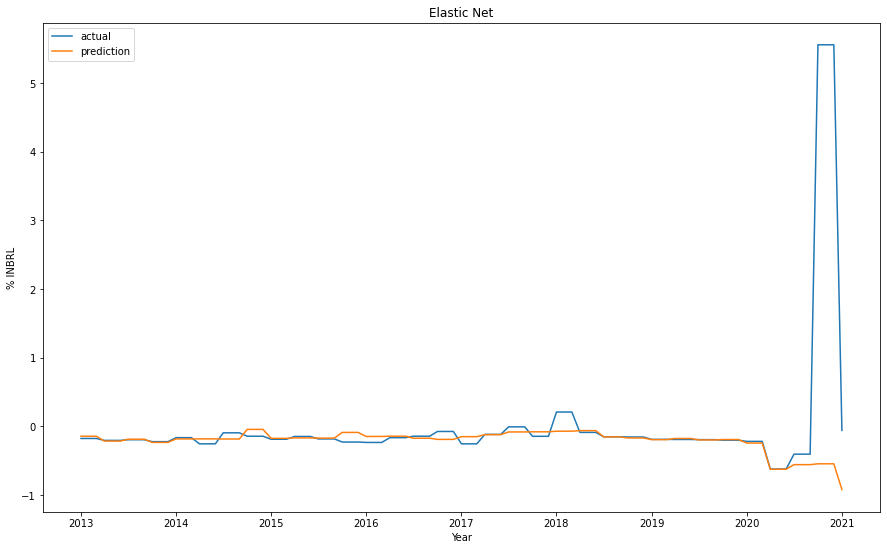

In [22]:
# Elastic Net
# model running
elnet = ElasticNet(alpha=0.001, l1_ratio=0.9, tol=0.2)
elnet_train = elnet.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_elnet = np.concatenate((elnet_train.predict(x_train_model),elnet_train.predict(x_test_model)))
yact_elnet = np.concatenate((y_train.values, y_test.values))

# plotting
df_elnet = pd.DataFrame(
    {'period': data.index, 'actual': yact_elnet, 'prediction': ypred_elnet})
df_elnet.index = df_elnet['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_elnet['actual'],label='actual')
ax.plot(df_elnet['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INBRL')
ax.set_title('Elastic Net')

#rmse
rmse_elnet_train = rmse(elnet_train.predict(x_train_model), y_train.values)
rmse_elnet_test = rmse(elnet_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_elnet_train, 
      '\nrmse testing = ',
      rmse_elnet_test)

# XGboost

In [43]:
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
parameter_xgb = {
    "xgb__eta" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    'xgb__min_child_weight':[1,2,3,4,5], 
    'xgb__gamma':[i/10.0 for i in range(3,6)], 
    'xgb__subsample':[i/10.0 for i in range(6,11)], #sampling baris
    'xgb__colsample_bytree':[i/10.0 for i in range(6,11)],  
    'xgb__max_depth': max_depth,}

#xgb = xg.XGBRegressor()

#pipe_xgb = Pipeline([('xgb', xgb)])

In [44]:
xgb = XGBRegressor()

In [45]:
pipe_xgb = Pipeline([('xgb', xgb)])

In [46]:
grid_search_xgb = GridSearchCV(pipe_xgb, parameter_xgb, cv=tscv, n_jobs=-1, scoring=rmse_score)
grid_search_xgb.fit(x_train, y_train)
best_score_xgb = grid_search_xgb.best_score_
best_model_xgb = grid_search_xgb.best_estimator_

In [47]:
best_model_xgb

Pipeline(steps=[('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1.0, eta=0.3, gamma=0.3,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=100, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.9, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [23]:
xg = XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1.0, eta=0.3, gamma=0.3,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=100, min_child_weight=1,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.9, tree_method='exact',
                              validate_parameters=1, verbosity=None)
xg_train = xg.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_xg = np.concatenate((xg_train.predict(x_train_model),xg_train.predict(x_test_model)))
yact_xg = np.concatenate((y_train.values, y_test.values))

rmse training =  0.09858322003099568 
rmse testing =  3.8181446244927053


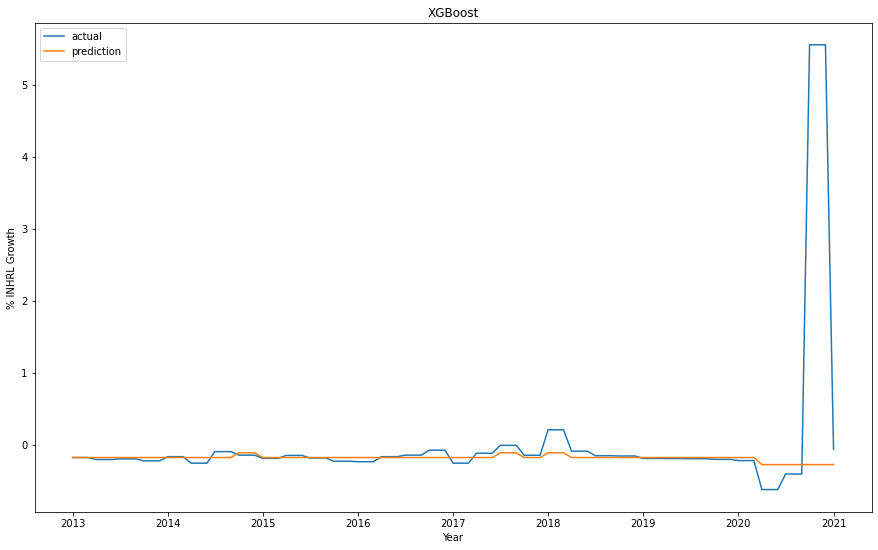

In [24]:
df_xg = pd.DataFrame(
    {'period': data.index, 'actual': yact_xg, 'prediction': ypred_xg})
df_xg.index = df_xg['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_xg['actual'],label='actual')
ax.plot(df_xg['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('XGBoost')

#rmse
rmse_xg_train = rmse(xg_train.predict(x_train_model), y_train.values)
rmse_xg_test = rmse(xg_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_xg_train, 
      '\nrmse testing = ',
      rmse_xg_test)

# SVR

In [51]:
parameter_svr = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree' : [x for x in range(0,5)],
    'svr__gamma' : ['scale', 'auto']
}
pipe_svr = Pipeline([('svr', SVR())])


In [52]:
grid_search_svr = GridSearchCV(pipe_svr, parameter_svr, cv=tscv, n_jobs=-1, scoring=rmse_score)
grid_search_svr.fit(x_train, y_train)
best_score_svr = grid_search_svr.best_score_
best_model_svr = grid_search_svr.best_estimator_

In [53]:
best_model_svr

Pipeline(steps=[('svr', SVR(degree=0, kernel='linear'))])

In [25]:
# model running
svm = SVR(degree=0, kernel='linear')
svm_train = svm.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_svm = np.concatenate((svm_train.predict(x_train_model),svm_train.predict(x_test_model)))
yact_svm = np.concatenate((y_train.values, y_test.values))

rmse training =  0.07681183424777678 
rmse testing =  3.953027608106441


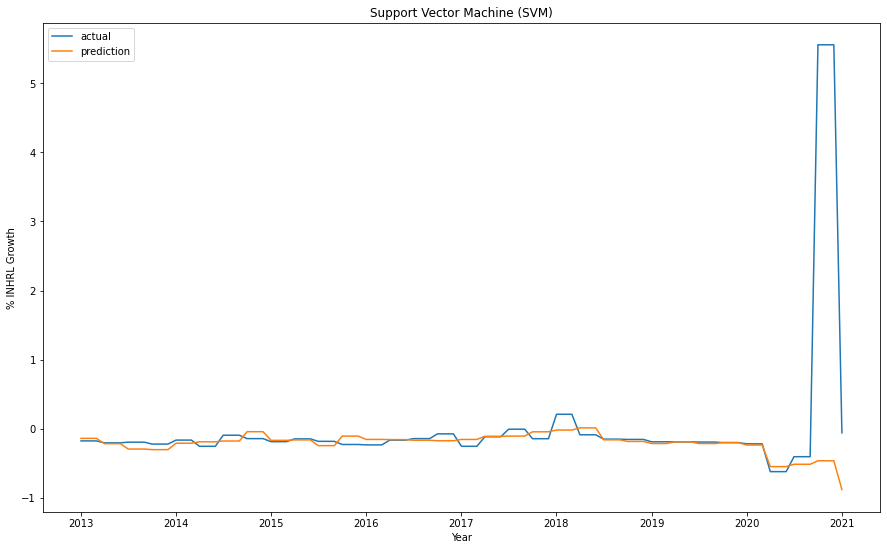

In [26]:
df_svm = pd.DataFrame(
    {'period': data.index, 'actual': yact_svm, 'prediction': ypred_svm})
df_svm.index = df_svm['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_svm['actual'],label='actual')
ax.plot(df_svm['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('Support Vector Machine (SVM)')

#rmse
rmse_svm_train = rmse(svm_train.predict(x_train_model), y_train.values)
rmse_svm_test = rmse(svm_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_svm_train, 
      '\nrmse testing = ',
      rmse_svm_test)

# Random Forest

In [27]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
parameter_rfr = {
    'rfr__n_estimators': n_estimators,
    'rfr__max_features': max_features,
    'rfr__max_depth': max_depth
}

In [28]:
pipe_rfr = Pipeline([('rfr', RandomForestRegressor())])
grid_search_rfr = GridSearchCV(pipe_rfr, parameter_rfr, cv=tscv, n_jobs=1, scoring=rmse_score)
grid_search_rfr.fit(x_train, y_train)
best_score_rfr = grid_search_rfr.best_score_
best_model_rfr = grid_search_rfr.best_estimator_

In [29]:
best_model_rfr

Pipeline(steps=[('rfr',
                 RandomForestRegressor(max_depth=100, n_estimators=200))])

In [30]:
# model running
rf = RandomForestRegressor(max_depth=100, n_estimators=200)
rf_train = rf.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_rf = np.concatenate((rf_train.predict(x_train_model),rf_train.predict(x_test_model)))
yact_rf = np.concatenate((y_train.values, y_test.values))

rmse training =  0.006853446898111426 
rmse testing =  4.030153232499978


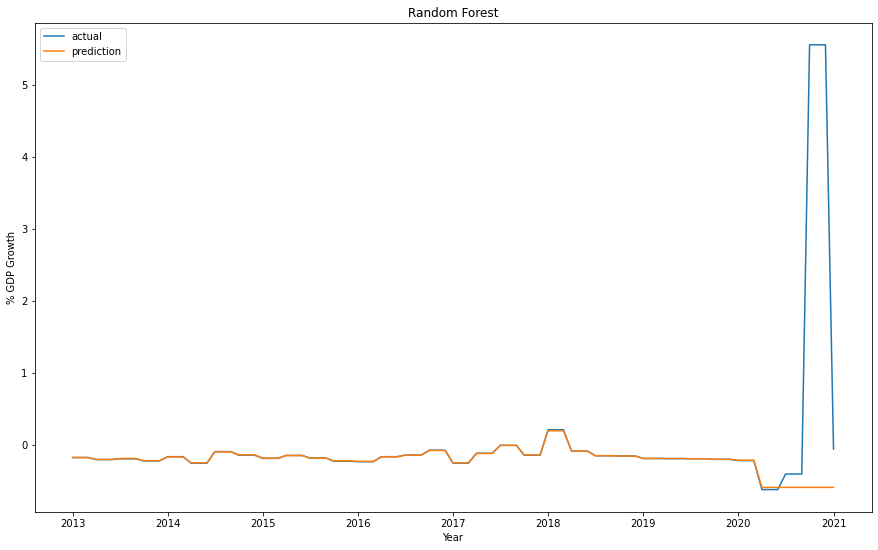

In [31]:
# plotting
df_rf = pd.DataFrame(
    {'period': data.index, 'actual': yact_rf, 'prediction': ypred_rf})
df_rf.index = df_rf['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_rf['actual'],label='actual')
ax.plot(df_rf['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% GDP Growth')
ax.set_title('Random Forest')

#rmse
rmse_rf_train = rmse(rf_train.predict(x_train_model), y_train.values)
rmse_rf_test = rmse(rf_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_rf_train, 
      '\nrmse testing = ',
      rmse_rf_test)

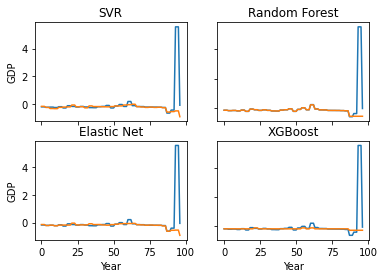

In [32]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(yact_svm)
axs[0, 0].plot(ypred_svm)
axs[0, 0].set_title('SVR')
axs[0, 1].plot(yact_rf)
axs[0, 1].plot(ypred_rf)
axs[0, 1].set_title('Random Forest')
axs[1, 0].plot(yact_elnet)
axs[1, 0].plot(ypred_elnet)
axs[1, 0].set_title('Elastic Net')
axs[1, 1].plot(yact_xg)
axs[1, 1].plot(ypred_xg)
axs[1, 1].set_title('XGBoost')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='GDP')
    
for ax in axs.flat:
    ax.label_outer()

In [33]:
data

,csplrl,invrl,mgsrl,inbrl
period,,,,
2013-01-01,0.218741,0.421710,-0.073987,-0.176080
2013-02-01,0.218741,0.421710,-0.073987,-0.176080
2013-03-01,0.218741,0.421710,-0.073987,-0.176080
2013-04-01,-0.118069,-0.162072,-0.088466,-0.204023
2013-05-01,-0.118069,-0.162072,-0.088466,-0.204023
...,...,...,...,...
2020-09-01,-2.585811,-2.310400,0.100537,-0.404592
2020-10-01,-2.479593,-2.279549,0.027333,5.555025
2020-11-01,-2.479593,-2.279549,0.027333,5.555025
